Saving whatsapp-chat-data.txt to whatsapp-chat-data (2).txt
Total messages: 13379
Most common words: [('the', 1446), ('i', 1361), ('it', 1130), ('to', 1074), ('is', 1044), ('this', 1031), ('you', 942), ('for', 892), ('a', 884), ('and', 753)]


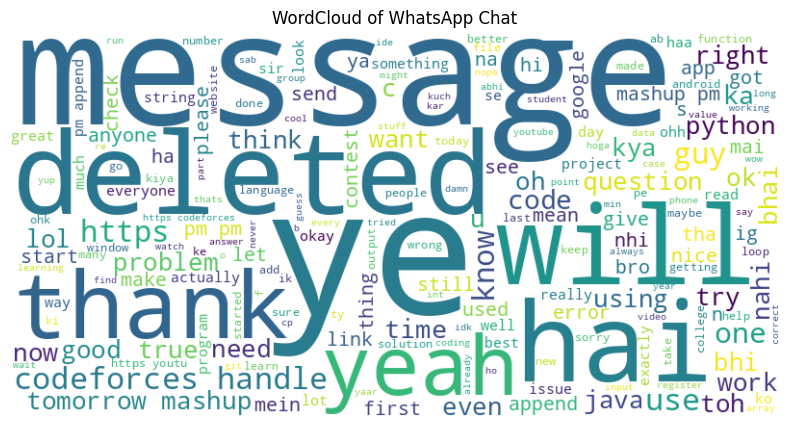

Top emojis used: [('🥂', 1), ('📢', 1), ('🤣', 1), ('💛', 1), ('🤩', 1)]


In [2]:
# STEP 1: Install necessary packages
!pip install emoji wordcloud

# STEP 2: Import libraries
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import emoji

# STEP 3: Upload your WhatsApp chat (.txt file)
from google.colab import files
uploaded = files.upload()

# STEP 4: Read the uploaded file
file_name = list(uploaded.keys())[0]
with open(file_name, 'r', encoding='utf-8') as f:
    chat = f.readlines()

# STEP 5: Basic preprocessing
messages = []
for line in chat:
    match = re.search(r'\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2} [APap][Mm] - (.*?): (.*)', line)
    if match:
        sender = match.group(1)
        message = match.group(2)
        messages.append(message)

# STEP 6: Basic stats
print(f"Total messages: {len(messages)}")

# STEP 7: Remove media messages and system messages
cleaned = [m for m in messages if '<Media omitted>' not in m and 'joined using this' not in m]

# STEP 8: Word frequency analysis
all_words = ' '.join(cleaned).lower()
words = re.findall(r'\b\w+\b', all_words)
word_freq = Counter(words)
most_common = word_freq.most_common(10)
print("Most common words:", most_common)

# STEP 9: Wordcloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of WhatsApp Chat")
plt.show()

# STEP 10: Emoji usage (fixed for new emoji version)
from emoji import distinct_emoji_list

emojis = distinct_emoji_list(all_words)
emoji_freq = Counter(emojis).most_common(5)
print("Top emojis used:", emoji_freq)

